# Project 1: Standardized Test Analysis

--- 
# Part 1

---

## Problem Statement

This project examines the performance of California high school students on college entrance exams to identify specific schools that could benefit from additional resources. Moreover, this project identifies a few trends that may be generalizable to other states and/or schools not surveyed. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

#### College Exams in the US

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

#### Poverty in US High Schools
In an attempt to address discrepancies in student preparation that result from poverty at home, the federal government has a few income-based assistance programs in place at schools. Information about program eligibility is publicly available and serves as an indirect measurement of poverty in the school community. 

One of these federally funded programs is the [National School Lunch program](https://www.fns.usda.gov/nslp/nslp-fact-sheet), which provides a nutritionally-balanced lunch for little or no cost to children at their school (public or private). About 30 million kids receive meals through the program every year. Eligibility for the program is usually referred to as "Free and Reduced Lunch" eligibility. 

Another major federal funding initiative is [Title I](https://www2.ed.gov/programs/titleiparta/index.html). Based largely on census data, schools or school districts receive extra funds to support low-achieving students in core academic subjects. Over 26 million students at over 55,000 schools received extra support through Title I in 2016, including about 5 million high school students. 

### Choose your Data

I'll be using the 2019 SAT Scores by State, 2019 SAT Scores in California by School, and an outside data set from the National Center for Educational Statistics (NCES). 

- 2019 SAT Scores by State: Includes mean average scores (math, reading/writing, and combined total) and participation rate from all 50 states plus DC and Puerto Rico
- 2019 SAT Scores in California by School: Participation rate and average scores for each school in California. Everything is broken out by 11th and 12th grade as well as combined. 
- NCES California High Schools: This includes qualitative and quantitative descriptors of California high schools, including Free and Reduced Lunch eligibility and Title I status. 

### Outside Research

* [National Center for Education Statistics (NCES)](https://nces.ed.gov/ccd/schoolsearch/) allows you to obtain Free and Reduced Lunch and Title I info on any school within your search paramaters, and it includes a school ID which is the same as the one used in the SAT and ACT data. I searched for all California high schools and merged the NCES data with the SAT California data. 

* I also confirmed the oft-mentioned relationship between higher education and lifetime earnings. The [Social Security Administration](https://www.ssa.gov/policy/docs/research-summaries/education-earnings.html) has a succinct but compelling article on the topic. 

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
some_nums = [5, 10, 15, 20, 25]

def mean_avg(numbers):
    num_sum = 0
    for number in numbers:
        num_sum += number
    return num_sum / len(numbers)
mean_avg(some_nums)

15.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def stdev(numbers):
    sigma = 0
    for number in numbers:
        sigma += (abs(number - mean_avg(numbers)))**2
    return (sigma / len(numbers)) ** .5
stdev(some_nums)

7.0710678118654755

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def convert_pct(x):
    return (int(x.strip('%')) * 0.01)
convert_pct('50%')

0.5

--- 
# Part 2
---

*All libraries used should be added here*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Import and Cleaning

#### First look at the data

In [5]:
sat_2019 = pd.read_csv('../data/sat_2019.csv')
sat_ca = pd.read_csv('../data/sat_2019_ca.csv')
nces = pd.read_csv('../data/ncesdata_calif.csv')

In [6]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [7]:
sat_ca.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


The data I downloaded from NCES was pretty messy, so I've included the first 20 rows to give you a fuller picture of how it looked originally. As you can see, the first 12 rows are mainly nulls except for the first column, which contains some long strings explaining various abbreviations present in the data and some other meta data. Then the column names appear on row 13. Removing the first 13 rows and renaming the columns was the top priority to make this dataset useable. 

In [8]:
nces.head(20) #Displaying extra rows because this data was a real mess

,National Center for Education Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,"CCD public school data 2019-2020, 2020-2021 sc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The file contains (2776) records based on your...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NOTES:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* denotes a column with data from 2019-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[ ] indicates that the data are not applicable...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,[ ] indicates that the data are missing.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,[ ] indicates that the data do not meet NCES d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"The directory information on school name, addr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Data provided on student membership and staffi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking for missing values

The SAT 2019 data is not missing any values, but the SAT-California data had quite a few nulls in columns that are important to this project, namely information about students' test scores. 

In [9]:
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [10]:
sat_ca.isnull().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         276
PctERWBenchmark12         276
NumMathBenchmark12        276
PctMathBenchmark12        276
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         311
PctERWBenchmark11         311
NumMathBenchmark11        311
PctMathBenchmark11        311
TotNumBothBenchmark12     276
PctBothBenchmark12        276
TotNumBothBenchmark11     311
PctBothBenchmark11        311
Year                        1
Unnamed: 25              2580
dtype: int64

The NCES data initially looked okay in terms of nulls, save for the 13 rows that will very soon be deleted. The column called "Unnamed: 13" has 494 nulls, but it turns out this column is for the extra four digits in a US ZIP code, so it's not important to this data set. I'll end up deleting the entire column. 

However, some of the non-null values in other columns are actually non-numerical characters such as `*` or `-` which either need to be stripped and replaced with `nan`, or the remaining characters converted to `int` and `float`. 

In [11]:
nces.isnull().sum()

National Center for Education Statistics      2
Unnamed: 1                                   13
Unnamed: 2                                   13
Unnamed: 3                                   13
Unnamed: 4                                   13
Unnamed: 5                                   13
Unnamed: 6                                   13
Unnamed: 7                                   13
Unnamed: 8                                   13
Unnamed: 9                                   13
Unnamed: 10                                  13
Unnamed: 11                                  13
Unnamed: 12                                  13
Unnamed: 13                                 494
Unnamed: 14                                  13
Unnamed: 15                                  13
Unnamed: 16                                  13
Unnamed: 17                                  13
Unnamed: 18                                  13
Unnamed: 19                                  13
Unnamed: 20                             

#### Identifying obvious issues

The SAT data sets both have several columns that seem like they should be a `float` but are an `object`. These are the columns called "Participation Rate" or anything else with the abbreviation "Pct" in the name. 

In [12]:
sat_2019.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In addition to the percent values mentioned above, the SAT-California data set contains several columns with the abbreviation "Num" that are also `object` rather than `int`. It also has some opaque column names. 

In [13]:
sat_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

The NCES data has no column names, which makes it very hard to use. It also likely has a lot of wrong data types, because the first 12 rows contain strings that explain the data. The thirteenth row contains the column names, and the data itself starts on row 14. In addition, some columns that I would expect to be `int` or `float` contain non-numerical characters such as `*` when the value is missing. 

That means that every series is typed as `object`! Non-numerical characters will need to be stripped from those values and then what remains can be converted to `int` or `float`. 

In [14]:
nces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   National Center for Education Statistics  2788 non-null   object
 1   Unnamed: 1                                2777 non-null   object
 2   Unnamed: 2                                2777 non-null   object
 3   Unnamed: 3                                2777 non-null   object
 4   Unnamed: 4                                2777 non-null   object
 5   Unnamed: 5                                2777 non-null   object
 6   Unnamed: 6                                2777 non-null   object
 7   Unnamed: 7                                2777 non-null   object
 8   Unnamed: 8                                2777 non-null   object
 9   Unnamed: 9                                2777 non-null   object
 10  Unnamed: 10                               2777 n

#### Column maintenance

I can't do much with the NCES data until the columns are re-named. Luckily, the real names of the columns are in row 13 of the data frame. I also need to fix the SAT data columns so that all are lowercase and spaces are removed. To do this, I set up dictionaries for each of the three data frames with the new column names and mapped them onto them. Then I verified the new column names. 

In [15]:
new_columns_dict = {
    'National Center for Education Statistics': 'nces_scid', 
    'Unnamed: 1' : 'state_scid',
    'Unnamed: 2' : 'nces_distid',
    'Unnamed: 3' : 'state_distid', 
    'Unnamed: 4' : 'lowest_grade', 
    'Unnamed: 5' : 'highest_grade', 
    'Unnamed: 6' : 'school_name', 
    'Unnamed: 7' : 'district',
    'Unnamed: 8' : 'county', 
    'Unnamed: 9' : 'address', 
    'Unnamed: 10' : 'city', 
    'Unnamed: 11' : 'state', 
    'Unnamed: 12' : 'zip',
    'Unnamed: 13' : 'zip4', 
    'Unnamed: 14' : 'phone', 
    'Unnamed: 15' : 'locale_code', 
    'Unnamed: 16' : 'locale',
    'Unnamed: 17' : 'charter', 
    'Unnamed: 18' : 'magnet', 
    'Unnamed: 19' : 'title_1', 
    'Unnamed: 20' : 'title_1_wide',
    'Unnamed: 21' : 'num_students', 
    'Unnamed: 22' : 'num_teachers', 
    'Unnamed: 23' : 'teacher_student_ratio', 
    'Unnamed: 24' : 'free_lunch',
    'Unnamed: 25' : 'reduced_lunch'
}
nces.rename(columns = new_columns_dict, inplace = True)
nces.columns

Index(['nces_scid', 'state_scid', 'nces_distid', 'state_distid',
       'lowest_grade', 'highest_grade', 'school_name', 'district', 'county',
       'address', 'city', 'state', 'zip', 'zip4', 'phone', 'locale_code',
       'locale', 'charter', 'magnet', 'title_1', 'title_1_wide',
       'num_students', 'num_teachers', 'teacher_student_ratio', 'free_lunch',
       'reduced_lunch'],
      dtype='object')

In [16]:
new_columns_dict2 = {
    'CDS' : 'school_id', 
    'CCode' : 'ccode', 
    'CDCode' : 'cdcode', 
    'SCode' : 'scode', 
    'RType' : 'rtype', 
    'SName' : 'school_name', 
    'DName' : 'district', 
    'CName' : 'county',
    'Enroll12': 'enrollment_12', 
    'NumTSTTakr12' : 'test_takers_12', 
    'NumERWBenchmark12' : 'num_erw_benchmark_12', 
    'PctERWBenchmark12' : 'pct_erw_benchmark_met_12',
    'NumMathBenchmark12' : 'num_math_benchmark_12', 
    'PctMathBenchmark12' : 'pct_math_benchmark_met_12', 
    'Enroll11' : 'enrollment_11', 
    'NumTSTTakr11' : 'test_takers_11',
    'NumERWBenchmark11' : 'num_erw_benchmark_11', 
    'PctERWBenchmark11' : 'pct_erw_benchmark_met_11', 
    'NumMathBenchmark11' : 'num_math_benchmark_11',
    'PctMathBenchmark11' : 'pct_math_benchmark_met_11', 
    'TotNumBothBenchmark12' : 'total_both_benchmark_12', 
    'PctBothBenchmark12' : 'pct_both_benchmarks_met_12',
    'TotNumBothBenchmark11' : 'total_both_benchmarks_11', 
    'PctBothBenchmark11' : 'pct_both_benchmarks_11', 
    'Year' : 'school_year', 
    'Unnamed: 25' : 'empty'
}
sat_ca.rename(columns = new_columns_dict2, inplace = True)
sat_ca.columns

Index(['school_id', 'ccode', 'cdcode', 'scode', 'rtype', 'school_name',
       'district', 'county', 'enrollment_12', 'test_takers_12',
       'num_erw_benchmark_12', 'pct_erw_benchmark_met_12',
       'num_math_benchmark_12', 'pct_math_benchmark_met_12', 'enrollment_11',
       'test_takers_11', 'num_erw_benchmark_11', 'pct_erw_benchmark_met_11',
       'num_math_benchmark_11', 'pct_math_benchmark_met_11',
       'total_both_benchmark_12', 'pct_both_benchmarks_met_12',
       'total_both_benchmarks_11', 'pct_both_benchmarks_11', 'school_year',
       'empty'],
      dtype='object')

In [17]:
new_columns_dict3 = {
    'State' : 'state', 
    'Participation Rate' : 'participation_rate', 
    'EBRW' : 'avg_reading_writing_score', 
    'Math' : 'avg_math_score', 
    'Total' : 'avg_total_score'
}
sat_2019.rename(columns = new_columns_dict3, inplace = True)
sat_2019.columns

Index(['state', 'participation_rate', 'avg_reading_writing_score',
       'avg_math_score', 'avg_total_score'],
      dtype='object')

The NCES dataset will need to go through a few rounds of removing nulls. First, I'm going to get rid of the unimportant zip code column, so that I don't accidentally delete rows with good data when I drop null values later.  

In [18]:
nces.drop(columns = 'zip4', inplace = True)

That means that currently, the only cells with nulls are the 12 rows at the top. Removing null values at this point is one easy way to get rid of those rows. 

In [19]:
nces.isnull().sum()

nces_scid                 2
state_scid               13
nces_distid              13
state_distid             13
lowest_grade             13
highest_grade            13
school_name              13
district                 13
county                   13
address                  13
city                     13
state                    13
zip                      13
phone                    13
locale_code              13
locale                   13
charter                  13
magnet                   13
title_1                  13
title_1_wide             13
num_students             13
num_teachers             13
teacher_student_ratio    13
free_lunch               13
reduced_lunch            13
dtype: int64

In [20]:
nces.dropna(inplace = True)

This leaves the extra header row at the top of the NCES table. Using `iloc` I sliced off that row and re-saved the NCES data (somewhat optimistically) as `nces_clean`. 

In [21]:
nces.iloc[0,0:]

nces_scid                        NCES School ID
state_scid                      State School ID
nces_distid                    NCES District ID
state_distid                  State District ID
lowest_grade                         Low Grade*
highest_grade                       High Grade*
school_name                         School Name
district                               District
county                             County Name*
address                          Street Address
city                                       City
state                                     State
zip                                         ZIP
phone                                     Phone
locale_code                        Locale Code*
locale                                  Locale*
charter                                 Charter
magnet                                  Magnet*
title_1                         Title I School*
title_1_wide               Title 1 School Wide*
num_students                          St

In [22]:
nces_clean = nces.iloc[1:,0:]
nces_clean.head()

,nces_scid,state_scid,nces_distid,state_distid,lowest_grade,highest_grade,school_name,district,county,address,...,locale,charter,magnet,title_1,title_1_wide,num_students,num_teachers,teacher_student_ratio,free_lunch,reduced_lunch
14,060429013779,CA-3366993-0129882,0604290,CA-3366993,KG,12,21st Century Learning Institute,Beaumont Unified,Riverside County,PO Box 187,...,Suburb: Large,No,No,No,†,96.00000,–,†,46.00000,6.00000
15,060162010232,CA-1964212-1995596,0601620,CA-1964212,07,12,ABC Secondary (Alternative),ABC Unified,Los Angeles County,16534 S. Carmenita Rd.,...,Suburb: Large,No,No,Yes,No,71.00000,–,†,38.00000,0.00000
16,063762002045,CA-1563776-1530377,0637620,CA-1563776,KG,12,Abraham Lincoln Alternative,Southern Kern Unified,Kern County,2601 Rosamond Blvd.,...,Town: Fringe,No,No,No,†,66.00000,–,†,48.00000,2.00000
17,063315005148,CA-3367215-3336955,0633150,CA-3367215,09,12,Abraham Lincoln Continuation,Riverside Unified,Riverside County,4341 Victoria Ave.,...,City: Large,No,No,Yes,Yes,196.00000,–,†,163.00000,17.00000
18,063459005696,CA-4369666-4333795,0634590,CA-4369666,09,12,Abraham Lincoln High,San Jose Unified,Santa Clara County,123 Test St,...,City: Large,No,No,Yes,Yes,1725.00000,–,†,724.00000,162.00000


#### Converting data types

Now I can start removing non-numerical characters from columns that I need to convert to `float`. First I'll work on the percent columns in the SAT 2019 data frame. In the same function, I'll replace a few non-numerical values with `nan`.

In [23]:
def convert_pct(x):
    '''A percent converter that first checks if the string is made of 
    a specific non-numeric character present in the data set'''
    if x != '—': 
        return (int(x.strip('%')) * 0.01)

sat_2019['participation_rate'] = sat_2019['participation_rate'].map(convert_pct)

In [24]:
sat_2019.dtypes

state                         object
participation_rate           float64
avg_reading_writing_score      int64
avg_math_score                 int64
avg_total_score                int64
dtype: object

In both the SAT-California data and the NCES data, whoever put together the data used a variety of special symbol characters to denote missing or problematic data points. I wrote a function to replace those with nulls (based on a function we wrote in class during lesson 2.02) and eventually delete them altogether. 

In [25]:
def remove_weird_char(x):
    if x == '†':
        return np.nan
    elif x == '–':
        return np.nan
    elif x == 'None':
        return np.nan
    elif x == '*':
        return np.nan
    else:
        return float(x)
    
sat_ca['pct_erw_benchmark_met_12'] = sat_ca['pct_erw_benchmark_met_12'].map(remove_weird_char)
sat_ca['pct_math_benchmark_met_12'] = sat_ca['pct_math_benchmark_met_12'].map(remove_weird_char)
# sat_ca['pct_erw_benchmark_met_11'] = sat_ca['pct_erw_benchmark_met_11'].map(remove_weird_char)
# I accidentally dropped this column at some point, but I could live without it so I moved on. 
sat_ca['pct_math_benchmark_met_11'] = sat_ca['pct_math_benchmark_met_11'].map(remove_weird_char)
sat_ca['pct_both_benchmarks_met_12'] = sat_ca['pct_both_benchmarks_met_12'].map(remove_weird_char)
sat_ca['pct_both_benchmarks_11'] = sat_ca['pct_both_benchmarks_11'].map(remove_weird_char)
sat_2019['participation_rate'] = sat_2019['participation_rate'].map(remove_weird_char)
nces_clean['num_students'] = nces_clean['num_students'].map(remove_weird_char)
nces_clean['num_teachers'] = nces_clean['num_teachers'].map(remove_weird_char)
nces_clean['teacher_student_ratio'] = nces_clean['teacher_student_ratio'].map(remove_weird_char)
nces_clean['free_lunch'] = nces_clean['free_lunch'].map(remove_weird_char)
nces_clean['reduced_lunch'] = nces_clean['reduced_lunch'].map(remove_weird_char)

Now the data types look much more as expected. (Though recall that I did not clean up some columns that I know I will drop later.)

In [26]:
nces_clean.dtypes

nces_scid                 object
state_scid                object
nces_distid               object
state_distid              object
lowest_grade              object
highest_grade             object
school_name               object
district                  object
county                    object
address                   object
city                      object
state                     object
zip                       object
phone                     object
locale_code               object
locale                    object
charter                   object
magnet                    object
title_1                   object
title_1_wide              object
num_students             float64
num_teachers             float64
teacher_student_ratio    float64
free_lunch               float64
reduced_lunch            float64
dtype: object

In [27]:
sat_ca.dtypes

school_id                     float64
ccode                         float64
cdcode                        float64
scode                         float64
rtype                          object
school_name                    object
district                       object
county                         object
enrollment_12                 float64
test_takers_12                float64
num_erw_benchmark_12           object
pct_erw_benchmark_met_12      float64
num_math_benchmark_12          object
pct_math_benchmark_met_12     float64
enrollment_11                 float64
test_takers_11                float64
num_erw_benchmark_11           object
pct_erw_benchmark_met_11       object
num_math_benchmark_11          object
pct_math_benchmark_met_11     float64
total_both_benchmark_12        object
pct_both_benchmarks_met_12    float64
total_both_benchmarks_11       object
pct_both_benchmarks_11        float64
school_year                    object
empty                         float64
dtype: objec

#### Dropping columns

Before I drop null values, I decided to drop columns. Some columns contain many nulls (or all nulls!) but are not actually important to the analysis of the data, such as the `empty` column in the SAT-California data. If I were to drop nulls before dropping these irrelevant columns, I would likely drop a lot of rows that do contain all the information I need and would be otherwise useful to my analysis.

The columns that I want to keep are:
* The unique school ID so that the tables can be merged
* The school name for ease of reference
* Any percents that show performance on the SAT
* Metrics of student or community poverty
* School characteristics: locale, magnet/charter school. I don't *think* I'll use this, but I'm not certain yet. 

One really disappointing note about the NCES data: This data did not include teacher counts and/or teacher-student ratio. This information is not always available, but it would have been very interesting to compare teacher-student ratio to SAT scores. Instead, I dropped the columns altogether. 

In [28]:
sat_ca.drop(columns = ['ccode','cdcode','scode','rtype','num_erw_benchmark_12','num_math_benchmark_12','num_erw_benchmark_11','num_math_benchmark_11','total_both_benchmark_12','total_both_benchmarks_11','school_year','empty'], inplace = True)
nces_clean.drop(columns = ['nces_scid','nces_distid','state_distid','lowest_grade','highest_grade','address','city','state','zip','phone','locale_code','title_1_wide','num_teachers','teacher_student_ratio'], inplace = True)

In [29]:
sat_ca.columns

Index(['school_id', 'school_name', 'district', 'county', 'enrollment_12',
       'test_takers_12', 'pct_erw_benchmark_met_12',
       'pct_math_benchmark_met_12', 'enrollment_11', 'test_takers_11',
       'pct_erw_benchmark_met_11', 'pct_math_benchmark_met_11',
       'pct_both_benchmarks_met_12', 'pct_both_benchmarks_11'],
      dtype='object')

In [30]:
nces_clean.columns

Index(['state_scid', 'school_name', 'district', 'county', 'locale', 'charter',
       'magnet', 'title_1', 'num_students', 'free_lunch', 'reduced_lunch'],
      dtype='object')

#### Merging tables

Finally, my data is almost ready to merge the two California data sets. The SAT 2019 national data will stand on its own. 

The only thing I need to do before merging is to ensure that the school IDs are formatted the same in both the SAT and NCES data. NCES has appended a prefix "CA-" to the beginning of all its IDs. It also puts a special character in the middle, which the SAT data does not do. Both of those elements need to be stripped, so I wrote functions to do that and mapped them to the NCES data. 

But first, I duplicated the ID column so that it would be easy to recreate it if my functions didn't work correctly the first time. (They did not.)

In [31]:
nces_clean['duplicate_state_scid'] = nces_clean['state_scid']
nces_clean.head()

,state_scid,school_name,district,county,locale,charter,magnet,title_1,num_students,free_lunch,reduced_lunch,duplicate_state_scid
14,CA-3366993-0129882,21st Century Learning Institute,Beaumont Unified,Riverside County,Suburb: Large,No,No,No,96.0,46.0,6.0,CA-3366993-0129882
15,CA-1964212-1995596,ABC Secondary (Alternative),ABC Unified,Los Angeles County,Suburb: Large,No,No,Yes,71.0,38.0,0.0,CA-1964212-1995596
16,CA-1563776-1530377,Abraham Lincoln Alternative,Southern Kern Unified,Kern County,Town: Fringe,No,No,No,66.0,48.0,2.0,CA-1563776-1530377
17,CA-3367215-3336955,Abraham Lincoln Continuation,Riverside Unified,Riverside County,City: Large,No,No,Yes,196.0,163.0,17.0,CA-3367215-3336955
18,CA-4369666-4333795,Abraham Lincoln High,San Jose Unified,Santa Clara County,City: Large,No,No,Yes,1725.0,724.0,162.0,CA-4369666-4333795


These are the two cleaning functions. 

In [32]:
def just_scid(idstring):
    '''Removes the prefix CA- at the beginning of a string'''
    return str(idstring.strip('CA-'))
    
nces_clean['state_scid'] = nces_clean['state_scid'].map(just_scid)

In [33]:
def fix_ids(x):
    '''Rebuilds a new string that leaves out a specific unwanted character'''
    new_id = ''
    for char in x:
        if char != '-':
            new_id += char
    return float(new_id)

nces_clean['state_scid'] = nces_clean['state_scid'].map(fix_ids)

I found documentation about [how to do a merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#) on the pandas website. Because I want to see the correlation between poverty metrics and test scores, I chose the default join, which is an inner join. This type of join only includes rows for which the IDs in the two data sets match. I also chose 'one-to-one' validation, because there should be exactly one ID for each school. 

In [34]:
nces_sat = pd.merge(
    nces_clean,
    sat_ca,
    left_on = 'state_scid',
    right_on = 'school_id',
    validate = 'one_to_one')

Voila! A new table is created! 

I had some columns with the same information from both tables, which made it easy to spot-checking that the merge was done correctly. Then I dropped them and re-cleaned the names of the duplicate fields using a dictionary.

In [35]:
nces_sat.drop(columns = ['school_id', 'school_name_y', 'district_y', 'county_y', 'duplicate_state_scid'], inplace = True)

In [36]:
clean_columns_dict = {
    'school_name_x' : 'school_name',
    'district_x' : 'district',
    'county_x' : 'county'
}

nces_sat.rename(columns = clean_columns_dict, inplace = True)

I also finally dropped null values. Most of the remaining nulls were in the columns that show what percent of students met the benchmark, so without those values there would not be much point in keeping those rows of data. 

In [37]:
nces_sat.isnull().sum()

state_scid                      0
school_name                     0
district                        0
county                          0
locale                          0
charter                         0
magnet                          0
title_1                         0
num_students                    0
free_lunch                      2
reduced_lunch                   2
enrollment_12                   0
test_takers_12                  0
pct_erw_benchmark_met_12      474
pct_math_benchmark_met_12     474
enrollment_11                   0
test_takers_11                  0
pct_erw_benchmark_met_11      164
pct_math_benchmark_met_11     447
pct_both_benchmarks_met_12    474
pct_both_benchmarks_11        447
dtype: int64

In [38]:
nces_sat.dropna(inplace = True)

In [39]:
sat_2019.isnull().sum()
sat_2019.dropna(inplace = True)

#### Adding calculated columns

Because eligibility for free and reduced lunch is usually reported together, I decided to create a single column to represent this value. Moreover, the values NCES provided were raw numbers, but the percentage of enrolled students who are eligible is more comparable across schools of different sizes. After this was done, I dropped the original columns. 

In [40]:
nces_sat['free_reduced_lunch'] = (
    (nces_sat['free_lunch'] + nces_sat['reduced_lunch'])/nces_sat['num_students'])

In [41]:
nces_sat.drop(columns = ['free_lunch', 'reduced_lunch'], inplace = True)

I wanted to be able to compare each school's participation rate in the SAT to the state participation rates in the SAT 2019 data. So I created another percentage column using the number of enrolled students and the number of test takers. 

In [42]:
nces_sat['sat_participation_rate'] = (nces_sat['test_takers_11'] + nces_sat['test_takers_12']) / (nces_sat['enrollment_12'] + nces_sat['enrollment_11'])

In [43]:
nces_sat.drop(columns = ['test_takers_11', 'test_takers_12', 'enrollment_12', 'enrollment_11'], inplace= True)

#### Final Files

Here are the two final, clean data files. 

In [44]:
nces_sat_ca_2019 = nces_sat
nces_sat_ca_2019.to_csv('nces_sat_ca_2019.csv', index = False)

In [45]:
sat_natl_2019 = sat_2019
sat_natl_2019.to_csv('sat_natl_2019.csv', index = False)

In [46]:
sat_natl_2019 = pd.read_csv('sat_natl_2019.csv')

### Data Dictionary

Some of the terms in the NCES dataset are also defined in their [data glossary](https://nces.ed.gov/ccd/commonfiles/glossary.asp). 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|avg_math_score|int|SAT Natl 2019|the mean average score of all test-takers in the state on the math section of the SAT|
|avg_reading_writing_score|int|SAT Natl 2019|the mean average score of all test-takers in the state on the evidence-based reading and writing section of the SAT|
|avg_total_score|int|SAT Natl 2019|the mean average score of all test-takers in the state when both subscores on the two sections of the SAT are combined|
|charter|object|NCES|Per NCES: A school providing free public elementary and/or secondary education to eligible students under a specific charter granted by the state legislature or other appropriate authority, and designated by such authority to be a charter school. See the [NCES glossary](https://nces.ed.gov/ccd/commonfiles/glossary.asp)|
|county|object|NCES, SAT-CA|the county where the school is located|
|district|object|NCES, SAT-CA|the school district the school is part of|
|free_reduced_lunch|float|NCES|percent of all students at the school who meet the income-based federal eligibility criteria to receive low-cost or no-cost meals through the National School Lunch program|
|locale|object|NCES|Per NCES: An indication of school's location relative to a populous area. The locales assigned to school districts are based on the locale code of their schools, weighted by the size of the schools' membership. The urban-centric locale assignment system has been used starting in 2006-07. For more detailed definitions, please see the [NCES glossary](https://nces.ed.gov/ccd/commonfiles/glossary.asp).|
|magnet|object|NCES|Per NCES: A special school or program designed to attract students of different racial/ethnic backgrounds for the purpose of reducing, preventing, or eliminating racial isolation (50 percent or more minority enrollment); and/or to provide an academic or social focus on a particular theme (e.g., science/math, performing arts, gifted/talented, or foreign language). See the [NCES glossary](https://nces.ed.gov/ccd/commonfiles/glossary.asp)|
|num_students|int|NCES|the total enrollment for the school in the 2019-20 school year|
|participation_rate|float|SAT Natl 2019|percent of eligible students in the state who took the SAT exam during that school year|
|participation_rate|float|SAT-CA|percent of all students enrolled in the school who took the SAT exam as an 11th or 12th grader during that school year|
|pct_erw_benchmark_met_12|float|SAT-CA|percentage of 12th grade students meeting the SAT benchmark score in evidence-based reading and writing (ERW)|
|pct_math_benchmark_met_12|float|SAT-CA|percentage of 12th grade students meeting the SAT benchmark score in math|
|pct_math_benchmark_met_11|float|SAT-CA|percentage of 11th grade students meeting the SAT benchmark score in math|
|pct_both_benchmarks_met_12|float|SAT-CA|percentage of 12th grade students meeting both SAT benchmark scores in evidence-based reading and writing and math|
|pct_both_benchmarks_11|float|SAT-CA|percentage of 11th grade students meeting both SAT benchmark scores in evidence-based reading and writing and math|
|school_name|object|NCES, SAT-CA|the official name of the school|
|state|object|all|state, territory, or federally recognized region of the United States|
|state_scid|float|NCES, SAT-CA|a unique identifier for each school in the data set| |title_1|object|NCES|Yes/No value indicating if this school receives federal funding under Title I to support core academic programming at low-income schools|

## Exploratory Data Analysis

### Summary Data

First looked at the `.describe()` values for both final data sets. 

In [47]:
sat_natl_2019.describe()

,participation_rate,avg_reading_writing_score,avg_math_score,avg_total_score
count,51.000000,51.000000,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431
std,0.387476,46.248035,51.290553,97.197910
min,0.020000,483.000000,460.000000,943.000000
25%,0.055000,527.500000,511.500000,1038.000000
50%,0.540000,550.000000,546.000000,1097.000000
75%,0.820000,612.000000,599.000000,1210.000000
max,1.000000,636.000000,648.000000,1284.000000


In [48]:
nces_sat.describe()

,state_scid,num_students,pct_erw_benchmark_met_12,pct_math_benchmark_met_12,pct_math_benchmark_met_11,pct_both_benchmarks_met_12,pct_both_benchmarks_11,free_reduced_lunch,sat_participation_rate
count,1.018000e+03,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,2.906978e+13,1621.724951,68.772210,47.030039,55.381228,44.540265,52.861385,0.581000,0.450843
std,1.370863e+13,810.832892,20.062193,23.427783,27.118598,23.489281,27.311470,0.260520,0.186480
min,1.611190e+12,142.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.012034,0.101322
25%,1.964733e+13,972.250000,54.415000,28.452500,32.347500,25.197500,29.012500,0.364719,0.304242
50%,3.066548e+13,1673.500000,72.020000,46.380000,58.375000,43.500000,55.100000,0.618937,0.415165
75%,3.768411e+13,2173.750000,85.710000,65.350000,78.570000,62.982500,76.445000,0.801871,0.562275
max,5.872770e+13,4645.000000,100.000000,100.000000,100.000000,100.000000,99.680000,0.994728,1.031579


Since this project focuses on California, how did California do overall on the SAT in 2019? It looks like they had a somewhat lower score than average, but higher participation. 

In [49]:
sat_natl_2019[sat_natl_2019['state'] == 'California']

,state,participation_rate,avg_reading_writing_score,avg_math_score,avg_total_score
4,California,0.63,534,531,1065


In [50]:
sat_natl_2019['avg_total_score'].mean()

1113.078431372549

In [51]:
sat_natl_2019['participation_rate'].mean()

0.49058823529411755

### Standard Deviation

I found an extremely relevant bit of code to build the dictionary comprehension here: https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns

In [52]:
sd_nces_sat = {column.name:stdev(column) for column in [nces_sat[i] for i in nces_sat.columns if (nces_sat[i].dtype=='float64') or (nces_sat[i].dtype=='int64')]}
sd_nces_sat

{'state_scid': 13701894109555.096,
 'num_students': 810.4345465307238,
 'pct_erw_benchmark_met_12': 20.052337078883358,
 'pct_math_benchmark_met_12': 23.41627365119587,
 'pct_math_benchmark_met_11': 27.10527555355439,
 'pct_both_benchmarks_met_12': 23.477740840189984,
 'pct_both_benchmarks_11': 27.298052071581992,
 'free_reduced_lunch': 0.2603916193029948,
 'sat_participation_rate': 0.1863879593216281}

In [53]:
sd_sat_natl_2019 = {column.name:stdev(column) for column in [sat_natl_2019[i] for i in sat_natl_2019.columns if (sat_natl_2019[i].dtype=='float64') or (sat_natl_2019[i].dtype=='int64')]}
sd_sat_natl_2019

{'participation_rate': 0.3836584048685726,
 'avg_reading_writing_score': 45.792378682545134,
 'avg_math_score': 50.78521461840036,
 'avg_total_score': 96.24027185617864}

### Trends and Questions

One thing that stood out was how the participation rate interacted with the test scores. Just looking at the highest and lowest participation rate states, even without a visualization, is very clear. As participation increases, the average total score decreases. 

In [54]:
sat_natl_2019.sort_values('participation_rate', ascending = False).head()

,state,participation_rate,avg_reading_writing_score,avg_math_score,avg_total_score
39,Rhode Island,1.0,503,492,995
13,Illinois,1.0,509,504,1013
22,Michigan,1.0,507,496,1003
5,Colorado,1.0,518,506,1024
6,Connecticut,1.0,529,516,1046


In [55]:
sat_natl_2019.sort_values('participation_rate', ascending = False).tail()

,state,participation_rate,avg_reading_writing_score,avg_math_score,avg_total_score
24,Mississippi,0.03,628,608,1237
15,Iowa,0.03,622,622,1244
49,Wisconsin,0.03,635,648,1283
50,Wyoming,0.03,623,615,1238
34,North Dakota,0.02,627,636,1263


This made me wonder if the same trend holds true at the school level -- that is, do schools with lower participation rates also have higher test scores? I created two masks for schools with high and low participation, and then looked at the percent of their 12th graders who got good test scores. 

It's possible that a more rigorous look would reveal something interesting, but it wasn't immediately obvious, so I ended up moving on. 

In [56]:
below_state_avg_part = nces_sat[(nces_sat['sat_participation_rate'] < .20)]
below_state_avg_part['pct_both_benchmarks_met_12'].mean()


37.56653061224488

In [57]:
above_avg_part = nces_sat[(nces_sat['sat_participation_rate'] >= .80)]
above_avg_part['pct_both_benchmarks_met_12'].mean()
above_avg_part['free_reduced_lunch'].mean()

0.7313090801134337

Then I wondered if schools with high participation rates would have particularly high or low free and reduced lunch eligibility, which might indicate whether or not low-income students were preparing for college. 

Unfortunately, there wasn't anything noticeably interesting about this comparison either. 

(Note that while the benchmark met values above are on a percent scale of 0 - 100, the free and reduced lunch values are on a percent scale of 0 - 1.)

In [58]:
above_avg_part['free_reduced_lunch'].mean()

0.7313090801134337

In [59]:
below_state_avg_part['free_reduced_lunch'].mean()

0.6916793507893003

I was also curious if either the school's locale or magnet/charter status had any bearing on how well students did on the test. I didn't have time to use this info, but I did run some quick looks at the data that made me think that the locale column in the NCES data would definitely be interesting to investigate further. Even a cursory comparison of the two largest locales -- "City: Large" and "Suburb: Large" -- shows a fairly large difference in mean values and range of values. 



In [60]:
nces_sat.groupby('locale')['pct_both_benchmarks_met_12'].describe()

,count,mean,std,min,25%,50%,75%,max
locale,,,,,,,,
City: Large,249.0,37.752610,23.784571,0.00,18.5200,33.060,55.5100,94.64
City: Midsize,82.0,49.291098,21.760904,3.28,29.9800,52.245,67.9075,84.85
City: Small,72.0,57.306806,24.243862,0.00,39.2775,60.555,78.5225,96.95
Rural: Distant,15.0,34.022667,19.780755,0.00,18.0000,35.000,48.5300,70.27
Rural: Fringe,66.0,42.134848,19.345301,5.95,26.2575,44.660,59.8325,74.63
Rural: Remote,2.0,54.860000,24.550747,37.50,46.1800,54.860,63.5400,72.22
Suburb: Large,369.0,46.438808,24.216083,0.00,27.5600,46.890,65.9000,98.75
Suburb: Midsize,39.0,49.645385,21.452970,10.00,31.1650,50.000,66.8200,89.03
Suburb: Small,31.0,50.357419,16.745320,17.07,38.7200,47.540,60.9800,88.81


The charter school and magnet school data were fairly dull. This could also be because there are so few charter and magnet schools compared to regular schools. Possibly, a dataset that focuses on charter and/or magnet schools would show different results. 

In [61]:
nces_sat.groupby('charter')['pct_both_benchmarks_met_12'].describe()

,count,mean,std,min,25%,50%,75%,max
charter,,,,,,,,
No,993.0,44.59569,23.558619,0.00,25.39,43.41,63.04,100.00
Yes,25.0,42.33880,20.850002,10.81,23.44,43.59,61.54,78.95


In [62]:
nces_sat.groupby('magnet')['pct_both_benchmarks_met_12'].describe()

,count,mean,std,min,25%,50%,75%,max
magnet,,,,,,,,
No,882.0,45.016825,23.427303,0.00,25.4900,44.46,63.255,100.0
Yes,136.0,41.449632,23.742428,1.39,22.6175,37.92,57.890,95.3


## Visualize the Data

The first thing I wanted to see was how strongly correlated free and reduced lunch eligibility is with performance on the SAT. I was curious if other interesting relationships between variables might show up in a heatmap as well, so that was the first visualization I made for this dataset. 

As this heatmap of the NCES-SAT combined data shows, there is a very strong negative correlation between SAT performance and free and reduced lunch eligibility. 

This heatmap did reveal strong positive correlations between the subscores on the test. That is, if someone did well on one subtest of the SAT, they seemed to do well on the other subtest as well, which in turn gave them a high overall score. This finding wasn't relevant to my project however. 

The `mask` code is a direct copy from our lesson 2.01. 

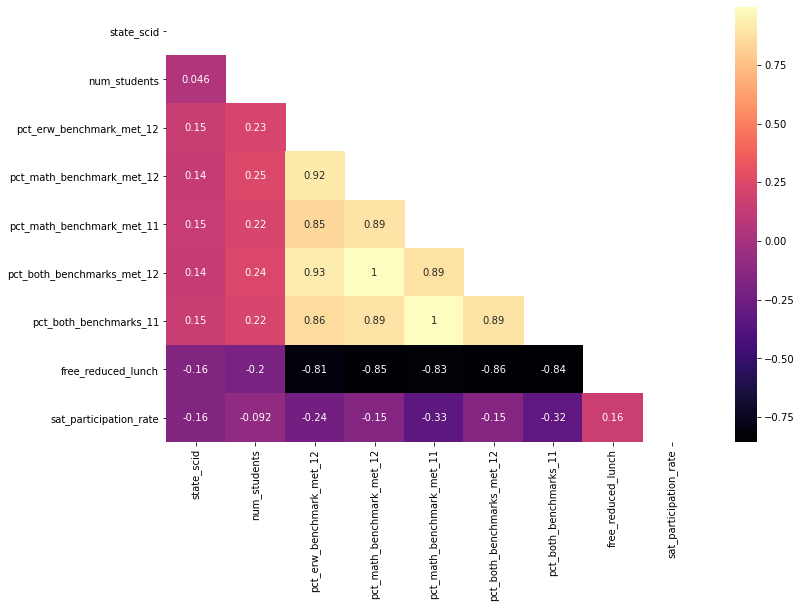

In [63]:
plt.figure(figsize = (12,8))

corr = nces_sat.corr() 

# Took this straight from lesson 2.01
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot = True,
           mask = mask,
           cmap = 'magma');

I really wanted to see the free and reduced lunch correlation as a scatterplot after seeing it in the heatmap. 

Just in case you're not seeing any labels... I changed the color of the tick marks, title, and axis labels to white in order to make them stand out better on my dark grey background. 

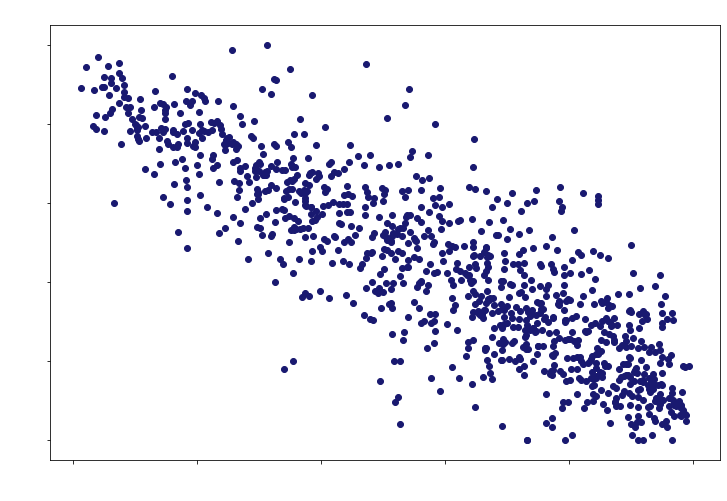

In [64]:
plt.figure(figsize = (12, 8))

plt.scatter(x = nces_sat['free_reduced_lunch'],  
            y = nces_sat['pct_both_benchmarks_met_12'],  
            color = 'midnightblue');

plt.xticks(color = 'white') # set the tick marks to white bc I have a dark background
plt.yticks(color = 'white')

plt.title('SAT Scores of 12th Graders Decline as Free and Reduced Lunch Eligibility Increases', size = 16, color = 'white');
plt.xlabel('Percent of Students Meeting Benchmark', size = 13, color = 'white')
plt.ylabel('Percent of Students on F/R Lunch', size = 13, color = 'white');

I also wanted to see if the effect of low socioeconomic status was observable at the school level. Free and reduced lunch is based on each individual household, so inasmuch as a school is a group of individual students, it does work to compare this household-level metric to a school-level phenomenon. But Title I applies at the school level, rather than the student level, so I wanted to make sure that the pattern still held. 

Title I status is a binary -- while schools may receive differing amounts of funding based on the socioeconomic factors of their respective communities, those amounts are not available. We only know if a school receives zero Title I funds or more than zero funds. 

I applied two masks for Title I status and created some histograms for various benchmark metrics from the NCES-SAT combined data. The pair below seemed to illustrate the income effect on test preparation best. 

In [65]:
title_1 = nces_sat[(nces_sat['title_1'] == 'Yes')]
not_title_1 = nces_sat[(nces_sat['title_1'] == 'No')]

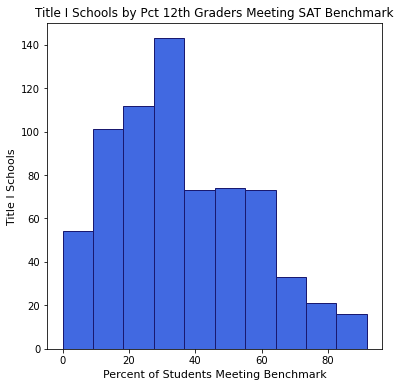

In [66]:
plt.figure(figsize = (6,6))

plt.hist(title_1['pct_both_benchmarks_met_12'], color = 'royalblue', bins = 10, ec = 'midnightblue');

plt.title('Title I Schools by Pct 12th Graders Meeting SAT Benchmark')
plt.xlabel('Percent of Students Meeting Benchmark', size = 11)
plt.ylabel('Title I Schools', size = 11);

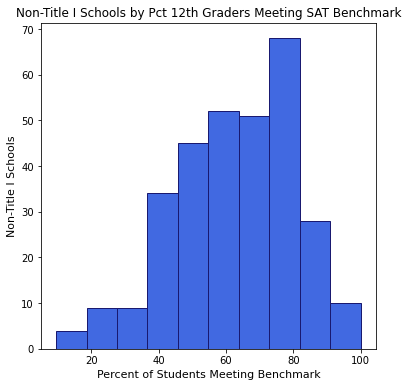

In [67]:
plt.figure(figsize = (6,6))

plt.hist(not_title_1['pct_both_benchmarks_met_12'], color = 'royalblue', bins = 10, ec = 'midnightblue');

plt.title('Non-Title I Schools by Pct 12th Graders Meeting SAT Benchmark')
plt.xlabel('Percent of Students Meeting Benchmark', size = 11)
plt.ylabel('Non-Title I Schools', size = 11);

In addition to test scores, I plotted the SAT participation rate of Title I and non-Title I schools. These two histograms also indicate that students from Title I may be less ready for college. Though both skew right, the Title I schools peak at around 25% participation while the non-Title I schools peak around 35% participation. 

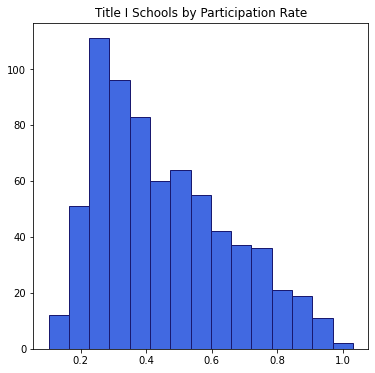

In [68]:
plt.figure(figsize = (6,6))

plt.hist(title_1['sat_participation_rate'], color = 'royalblue', bins = 15, ec = 'midnightblue');

plt.title('Title I Schools by Participation Rate');

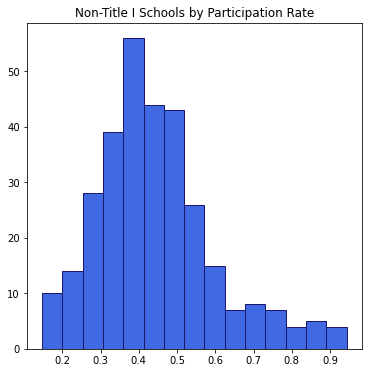

In [69]:
plt.figure(figsize = (6,6))

plt.hist(not_title_1['sat_participation_rate'], color = 'royalblue', bins = 15, ec = 'midnightblue');

plt.title('Non-Title I Schools by Participation Rate');


Switching gears somewhat, I made a few visualizations that I didn't use. I was curious to see the correlation between participation rate and test scores that I had glimpsed above in the SAT national data during EDA. The heatmap showed a very strong negative correlation. 

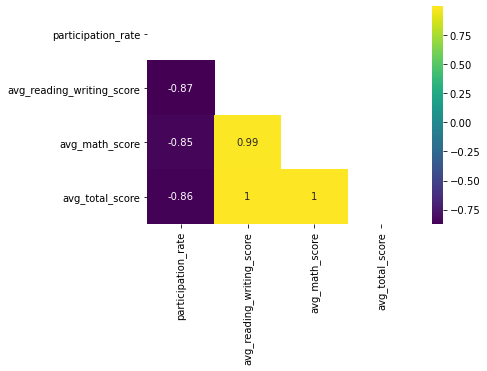

In [70]:
corr2 = sat_natl_2019.corr()

# Took this straight from lesson 2.01
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr2, annot = True, mask = mask, cmap = 'viridis');

I also wondered if a bar chart of the total SAT scores for each state (based on the SAT national data) would be useful. It ended up pretty hard to read, and I didn't think it illuminated anything particularly interesting, so I didn't use it. 

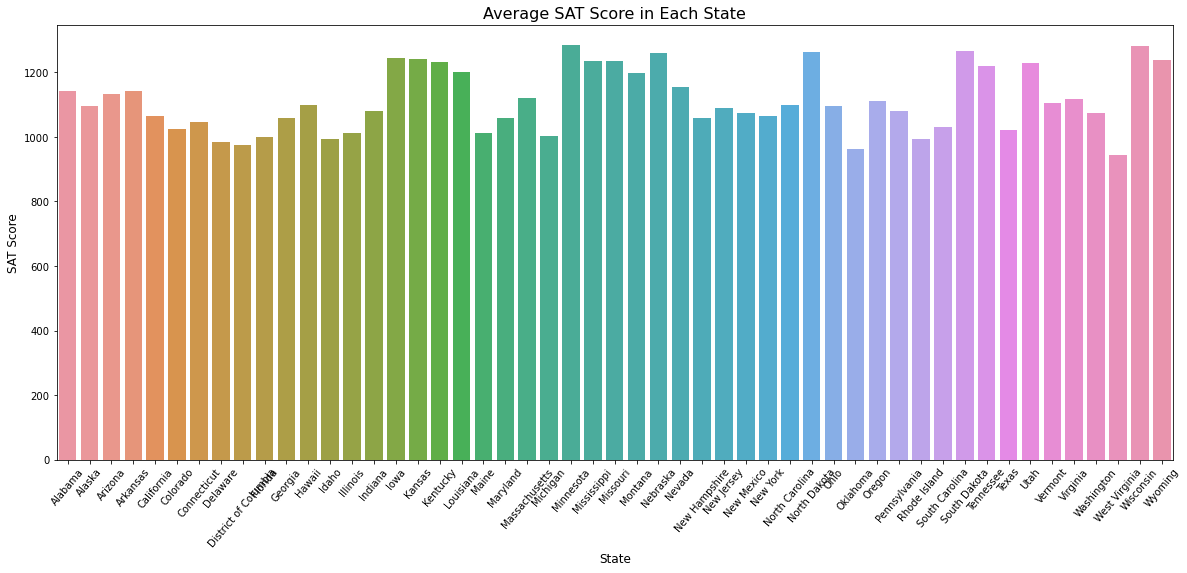

In [71]:
sns.set_palette(palette = 'bone')
# Side Note - changing the palette doesn't produce any effect for me. 

plt.figure(figsize = (20,8))

sns.barplot(x = sat_natl_2019['state'], y = sat_natl_2019['avg_total_score']);

plt.xticks(rotation = 50);

plt.title('Average SAT Score in Each State', size = 16)
plt.xlabel('State', size = 12)
plt.ylabel('SAT Score', size = 12);

## Conclusions and Recommendations

Based on my exploration of the data, I have a few recommendations for education policy-makers and non-profit organizations that operate out of public schools. 

- Given that a college degree is a proven mechanism for increasing lifetime earnings, it should be a priority to ensure that low-income students graduate ready for college. 
- Low-income California students are not as well-prepared for important college entrance exams like the SAT as their higher-income peers. We need to allocate additional resources to help more low-income students succeed on these tests.
- This project focuses on the state of California, but the conclusions are informed by national-level data. The relationship between free and reduced lunch eligibility and test scores is clear, strong, and alarming. Policy-makers in other jurisdictions should consider conducting similar examinations in their own region. 
- The two federal programs considered here -- National School Lunch and Title I -- are not sufficient to erase achievement disparities based on socioeconomic factors. We need to invest in our students if we want to see them go to college and break out of cyclical poverty. 


In [ ]:
title_1 = nces_sat[(nces_sat['title_1'] == 'Yes') & nces_sat['Percent of Students Meeting Benchmark']